# Arham Sheikh APS1080 Exericse 5

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1, Total Reward: 12.0
Episode 2, Total Reward: 11.0
Episode 3, Total Reward: 43.0
Episode 4, Total Reward: 23.0
Episode 5, Total Reward: 24.0
Episode 6, Total Reward: 18.0
Episode 7, Total Reward: 10.0
Episode 8, Total Reward: 8.0
Episode 9, Total Reward: 11.0
Episode 10, Total Reward: 29.0
Episode 11, Total Reward: 14.0
Episode 12, Total Reward: 43.0
Episode 13, Total Reward: 12.0
Episode 14, Total Reward: 34.0
Episode 15, Total Reward: 13.0
Episode 16, Total Reward: 12.0
Episode 17, Total Reward: 20.0
Episode 18, Total Reward: 12.0
Episode 19, Total Reward: 10.0
Episode 20, Total Reward: 21.0
Episode 21, Total Reward: 24.0
Episode 22, Total Reward: 25.0
Episode 23, Total Reward: 9.0
Episode 24, Total Reward: 14.0
Episode 25, Total Reward: 17.0
Episode 26, Total Reward: 23.0
Episode 27, Total Reward: 18.0
Episode 28, Total Reward: 20.0
Episode 29, Total Reward: 24.0
Episode 30, Total Reward: 24.0
Episode 31, Total Reward: 26.0
Episode 32, Total Reward: 35.0
Episode 33, Total R

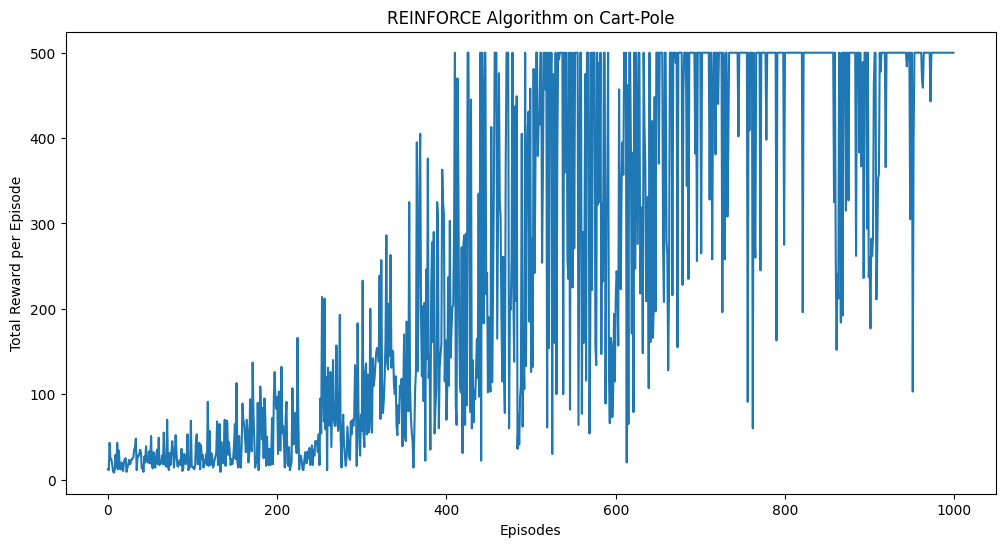

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1')

theta = np.zeros(4)
alpha = 0.01
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 1000

def policy(state, theta):
    z = np.dot(state, theta)
    return 1 / (1 + np.exp(-z))


total_rewards = []


for episode in range(1000):
  state = env.reset()
  state = np.array(state)
  done = False
  t = 0
  states = []
  actions = []
  rewards = []


  while not done:
    prob = policy(state, theta)
    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])
    else:
        action = 1 if np.random.rand() < prob else 0

    next_state, reward, done, _ = env.step(action)
    states.append(state)
    actions.append(action)
    rewards.append(reward)
    state = np.array(next_state)
    t += 1

  G = np.zeros(t)
  for i in range(t):
    G[i] = sum([gamma**(k-i) * rewards[k] for k in range(i, t)])


  for i in range(t):
    state = states[i]
    action = actions[i]
    G_t = G[i]
    prob = policy(state, theta)

    if action == 1:
        gradient = state * (1 - prob)
    else:
        gradient = state * (-prob)

    theta += alpha * gamma**i * G_t * gradient

  total_rewards.append(sum(rewards))
  epsilon = max(epsilon_min, epsilon * epsilon_decay)
  print(f"Episode {episode + 1}, Total Reward: {sum(rewards)}")

epsilon = 0

test_episodes = 100
test_rewards = []

for episode in range(test_episodes):
  state = env.reset()
  state = np.array(state)
  done = False
  total_reward = 0

  while not done:
    prob = policy(state, theta)
    action = 1 if np.random.rand() < prob else 0

    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = np.array(next_state)

  test_rewards.append(total_reward)

  print(f"Test Episode {episode + 1}, Total Reward: {total_reward}")


plt.figure(figsize=(12, 6))
plt.plot(total_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward per Episode')
plt.title('REINFORCE Algorithm on Cart-Pole')
plt.show()

env.close()
